In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [2]:
data = pd.read_csv('dataset.csv')

C:\Users\tarik\AppData\Local\Temp\ipykernel_240\3991704923.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


In [3]:
data.shape

(185474, 7)

In [4]:
data.dtypes

sender       object
receiver     object
date         object
subject      object
body         object
label       float64
urls         object
dtype: object

In [5]:
data.isnull().sum()

sender       955
receiver    6653
date        3302
subject     2979
body         634
label        786
urls         786
dtype: int64

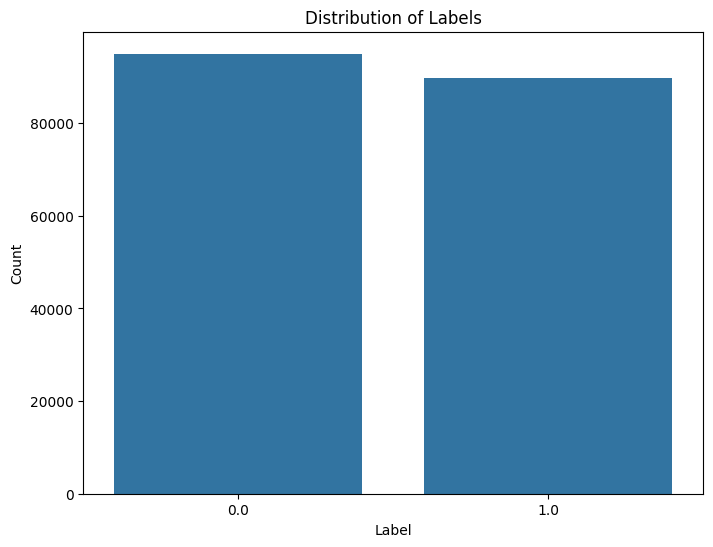

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [10]:
data.rename(columns={'urls': 'url_count'}, inplace=True)

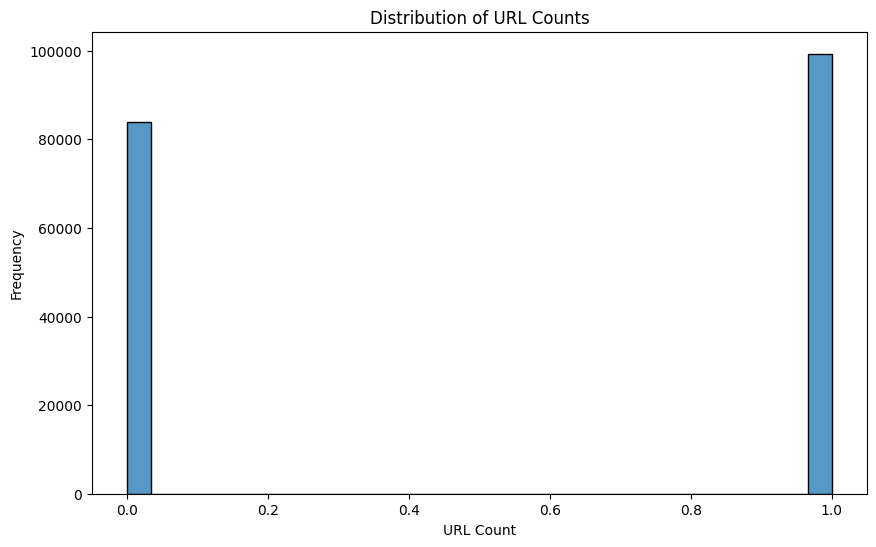

In [11]:
# Assuming url_count is a numerical column, if not convert it to numerical
data['url_count'] = pd.to_numeric(data['url_count'], errors='coerce')
plt.figure(figsize=(10,6))
sns.histplot(data['url_count'], bins=30, kde=False)
plt.title('Distribution of URL Counts')
plt.xlabel('URL Count')
plt.ylabel('Frequency')
plt.show()

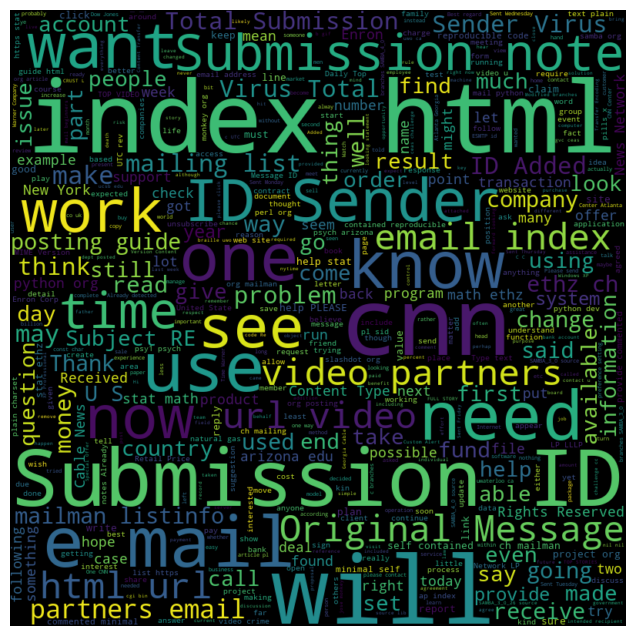

In [14]:
# Concatenate all rows of 'body' and 'subject' into a single string
combined_text = ' '.join(data['body'].fillna('') + ' ' + data['subject'].fillna(''))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, stopwords=STOPWORDS, background_color='black', max_words=500).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

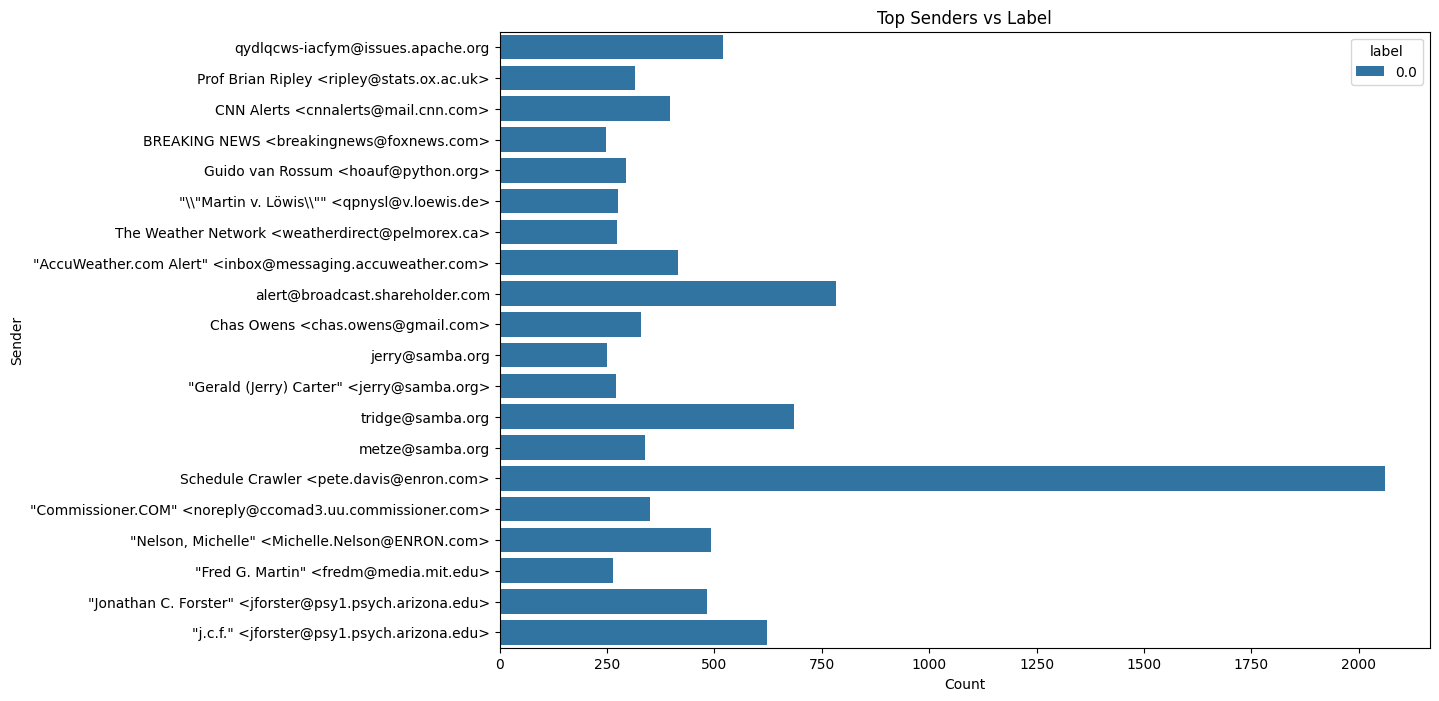

In [17]:
# Due to potentially high cardinality, consider sampling or aggregating
top_senders = data['sender'].value_counts().head(20).index
filtered_data = data[data['sender'].isin(top_senders)]

plt.figure(figsize=(12,8))
sns.countplot(y='sender', hue='label', data=filtered_data)
plt.title('Top Senders vs Label')
plt.xlabel('Count')
plt.ylabel('Sender')
plt.show()